### Henry Lin

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

#### READ FILE

In [98]:
df = pd.read_csv('../work/data/modified_data/la_housing_dataset_no_geo_property_id_cleanzip2.csv', encoding='latin-1')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,4,5,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### EDA

In [97]:
df.head()

,Unnamed: 0,Property ID,APN,General Category,Status,Status Date,Completion Date,Permit #,Permit Type,Permit Sub-Type,...,Address Number,Address Number (float),Street Direction,Street Name,Street Suffix,City,State,Zip Code,Unit Count,Council District
0,0,0,5080031003,Ellis Withdrawal,NaN,7/18/07 0:00,NaN,NaN,NaN,NaN,...,961,961.0,s,ardmore,ave,NaN,NaN,90006,NaN,NaN
1,1,1,5080031004,Ellis Withdrawal,NaN,7/18/07 0:00,NaN,NaN,NaN,NaN,...,965,965.0,s,ardmore,ave,NaN,NaN,90006,NaN,NaN
2,2,2,2182008020,Ellis Withdrawal,NaN,7/19/07 0:00,NaN,NaN,NaN,NaN,...,5114,5114.0,n,enfield,ave,NaN,NaN,91316,NaN,NaN
3,3,3,2203017041,Ellis Withdrawal,NaN,7/19/07 0:00,NaN,NaN,NaN,NaN,...,7450,7450.0,n,louise,ave,NaN,NaN,91406,NaN,NaN
4,4,4,2421030018,Ellis Withdrawal,NaN,7/24/07 0:00,NaN,NaN,NaN,NaN,...,4603,4603.0,n,denny,ave,NaN,NaN,91602,NaN,NaN


In [3]:
df.columns

Index(['Property ID', 'APN', 'General Category', 'Status', 'Status Date',
       'Completion Date', 'Permit #', 'Permit Type', 'Permit Sub-Type',
       'Work Description', 'Address Full', 'Address Number',
       'Address Number (float)', 'Street Direction', 'Street Name',
       'Street Suffix', 'City', 'State', 'Zip Code', 'Unit Count',
       'Council District'],
      dtype='object')

In [4]:
df['General Category'].unique()

array(['Ellis Withdrawal', 'Entitlement Change', 'Building Permits',
       'Demolition Permits', 'Is in RSO Inventory'], dtype=object)

In [5]:
df['Address Full'] = df['Address Full'].str.strip('')

In [7]:
pd.DataFrame(df.groupby('General Category').size())

,0
General Category,
Building Permits,457227
Demolition Permits,15097
Ellis Withdrawal,1475
Entitlement Change,50610
Is in RSO Inventory,140775


/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:2138: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


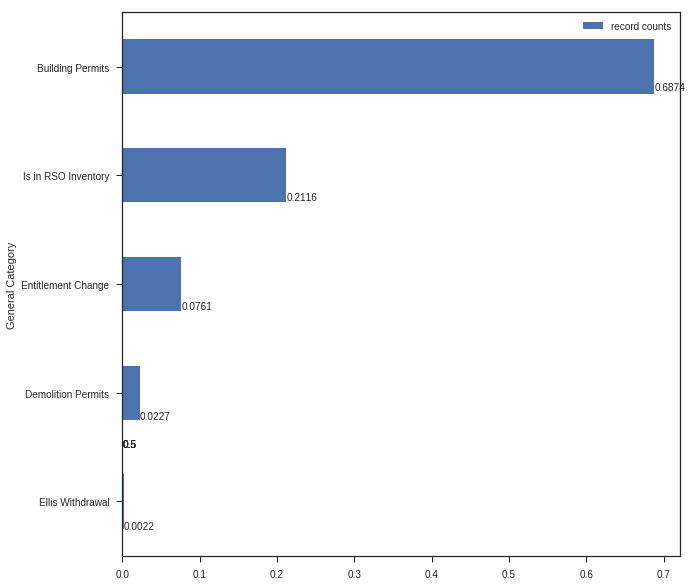

In [8]:

ax = pd.DataFrame(df.groupby('General Category').size() / len(df))\
       .rename(columns={0: 'record counts'})\
       .sort_values(by=['record counts'], ascending=True).plot(kind='barh', figsize=(10,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), textcoords='offset points')

In [9]:
temp = pd.DataFrame(df.groupby('Address Full')['APN'].nunique().sort_values(ascending=False).head(15))

In [10]:
temp.drop(['    '])

,APN
Address Full,
1525 N HAYWORTH AVE,12
4614 FINLEY AVE,10
14501 TUPPER ST,9
738 S AVERILL AVE,9
4800 LA VILLA MARINA,6
4928 W MARTIN LUTHER KING JR BLVD,5
1333 S BEVERLY GLEN BLVD,5
1619 W ROCKWOOD ST,4
4040 GRAND VIEW BLVD,4


/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:2138: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


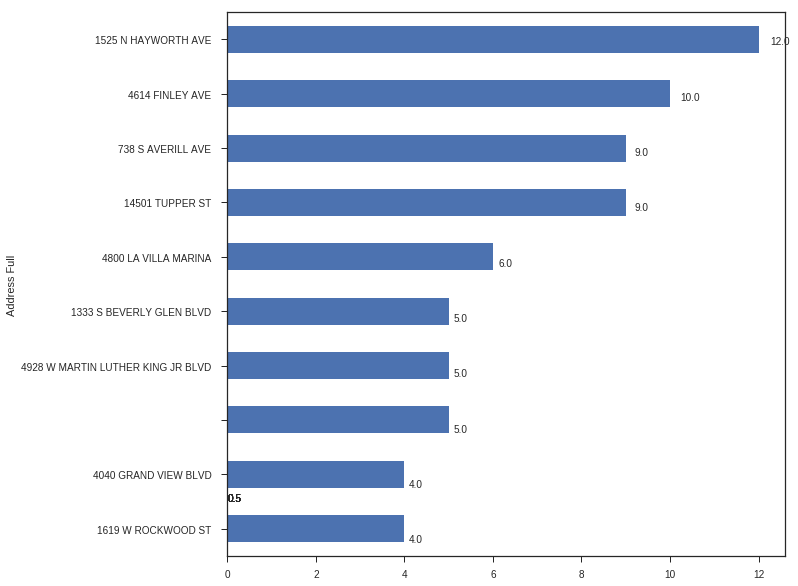

In [11]:
ax = df.groupby('Address Full')['APN'].nunique()\
  .sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), textcoords='offset points')

In [12]:
df[df['Address Full'] == '1525 N HAYWORTH AVE']

,Property ID,APN,General Category,Status,Status Date,Completion Date,Permit #,Permit Type,Permit Sub-Type,Work Description,...,Address Number,Address Number (float),Street Direction,Street Name,Street Suffix,City,State,Zip Code,Unit Count,Council District


In [35]:
df[df['General Category'] == 'Building Permits']

,Property ID,APN,General Category,Status,Status Date,Completion Date,Permit #,Permit Type,Permit Sub-Type,Work Description,...,Address Number,Address Number (float),Street Direction,Street Name,Street Suffix,City,State,Zip Code,Unit Count,Council District
52085,21767,NaN,Building Permits,CofO Issued,2007-08-22 00:00:00,NaN,07014-70000-05765,Bldg-Addition,1 or 2 Family Dwelling,"PROPOSED 13'-7"" X 13'-10"" MASTER BDRM W/ WALK-...",...,162,162.0,e,109th,pl,NaN,NaN,90061.0,NaN,NaN
52086,21768,NaN,Building Permits,CofO Issued,2007-08-22 00:00:00,NaN,07014-70000-05961,Bldg-Addition,1 or 2 Family Dwelling,PROPOSED REAR BATHRM & PATIO COVER ADDITION TO...,...,224,224.0,w,113th,st,NaN,NaN,90061.0,NaN,NaN
52087,21769,NaN,Building Permits,CofO Issued,2007-08-22 00:00:00,NaN,05014-10000-09558,Bldg-Addition,1 or 2 Family Dwelling,PROPOSED 12' x 15' FAMILY ROOM ADDITION BETWEE...,...,7312,7312.0,w,87th,pl,NaN,NaN,90045.0,NaN,NaN
52088,21770,NaN,Building Permits,Issued,2007-08-22 00:00:00,NaN,07016-10000-15984,Bldg-Alter/Repair,1 or 2 Family Dwelling,"KITCHEN REMODEL: REPLACE SINK, GARBAGE DISPOS...",...,1020,1020.0,s,harvard,blvd,NaN,NaN,90006.0,NaN,NaN
52089,21771,NaN,Building Permits,CofO Issued,2007-08-22 00:00:00,NaN,07047-20000-01389,Swimming-Pool/Spa,1 or 2 Family Dwelling,"ADD NEW 9' X 7'6"" SPA IN (E) POOL.NEW MECHANIC...",...,15950,15950.0,w,skytop,road,NaN,NaN,91436.0,NaN,NaN
52090,1882,NaN,Building Permits,CofO Issued,2007-08-22 00:00:00,NaN,07047-30000-01289,Swimming-Pool/Spa,1 or 2 Family Dwelling,Reduce width of existing pool by 6'.,...,5015,5015.0,s,pacific,ave,NaN,NaN,90292.0,NaN,NaN
52091,21772,NaN,Building Permits,Issued,2007-08-22 00:00:00,NaN,07020-20000-02438,Nonbldg-New,1 or 2 Family Dwelling,"NEW RETAINING WALL H=5', L=47' ALONG THE EAST ...",...,10526,10526.0,w,vinedale,st,NaN,NaN,91352.0,NaN,NaN
52092,21773,NaN,Building Permits,Permit Finaled,2007-08-22 00:00:00,NaN,07020-20000-03252,Nonbldg-New,Apartment,300 L.F. OF 8' HIGH MAX. CONC. BLK. FENCE WALL...,...,1401,1401.0,s,andrews,pl,NaN,NaN,90019.0,NaN,NaN
52093,21774,NaN,Building Permits,Permit Finaled,2007-08-22 00:00:00,NaN,07020-20000-03288,Nonbldg-New,1 or 2 Family Dwelling,105 FEET LONG BLOCK WALL 6 FEET HIGH ON PROPER...,...,19953,19953.0,w,archwood,st,NaN,NaN,91306.0,NaN,NaN
52094,21775,NaN,Building Permits,Permit Finaled,2007-08-22 00:00:00,NaN,07020-20000-03303,Nonbldg-New,Apartment,PROPOSED FREESTANDING BLOCK WALL FENCE PER LA ...,...,8935,8935.0,n,langdon,ave,NaN,NaN,91343.0,NaN,NaN


In [33]:
temp = df[df['General Category'] == 'Ellis Withdrawal']['Work Description'].dropna()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [99]:

def get_mean_tf_idf(text_col, ngram_range=(1,5)):
    """generate average term weight with in certain group.

    Args:
       text_col: text column in dataframe
       ngram_range: words you are interested in 
    Returns:
       dataframe consists (term, weight)

    """
    tvec = TfidfVectorizer(max_features=200,
                           token_pattern='(?u)\\b[a-zA-Z]\\w{2,}\\b',
                           max_df=0.05,
                           stop_words='english',
                           ngram_range=ngram_range)
    tvec_weights = tvec.fit_transform(text_col)
    weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})

    return weights_df

In [58]:
buidling_permit = df[df['General Category'] == 'Building Permits']

In [63]:
buidling_permit['Status'].unique()

array(['CofO Issued', 'Issued', 'Permit Finaled', 'Permit Expired',
       'CofO in Progress', 'Permit Closed', 'CofO Corrected',
       'Refund in Progress', 'Application Withdrawn', 'CofO Superseded',
       'No Progress', 'Partial Inspection', 'Order to Comply Issued',
       'TCO Issued', 'Partial Approval', 'TCO Renewed', 'Intent to Revoke',
       'Not Ready to Issue', 'Insp Scheduled', 'Permit Extended',
       'Approved', 'CofO Revoked', 'Conditional Approval',
       'Ready to Issue', 'Not Ready for Inspection', 'CofO Reactivated',
       'CofC Issued'], dtype=object)

In [100]:
urgent = buidling_permit[(buidling_permit['Status'].str.contains('CofO')) | (buidling_permit['Status'].str.contains('TCO')) ]

In [101]:
urgent['Status'].unique()

array(['CofO Issued', 'CofO in Progress', 'CofO Corrected',
       'CofO Superseded', 'TCO Issued', 'TCO Renewed', 'CofO Revoked',
       'CofO Reactivated'], dtype=object)

In [102]:
weight_df = get_mean_tf_idf(urgent['Work Description'].dropna())

In [83]:
weight_df.head(20)

,term,weight
0,accessory living,0.004910
1,add attached,0.003885
2,add bedroom,0.003410
3,add floor,0.003646
4,add irr,0.004149
5,add irregular,0.003904
6,add new,0.009881
7,add patio,0.003045
8,add patio cover,0.002398
9,add spa,0.003459


In [107]:
weight_df['weight_1000'] = weight_df["weight"]*1000
weight_df['weight_1000'] = weight_df['weight_1000'].apply(int)

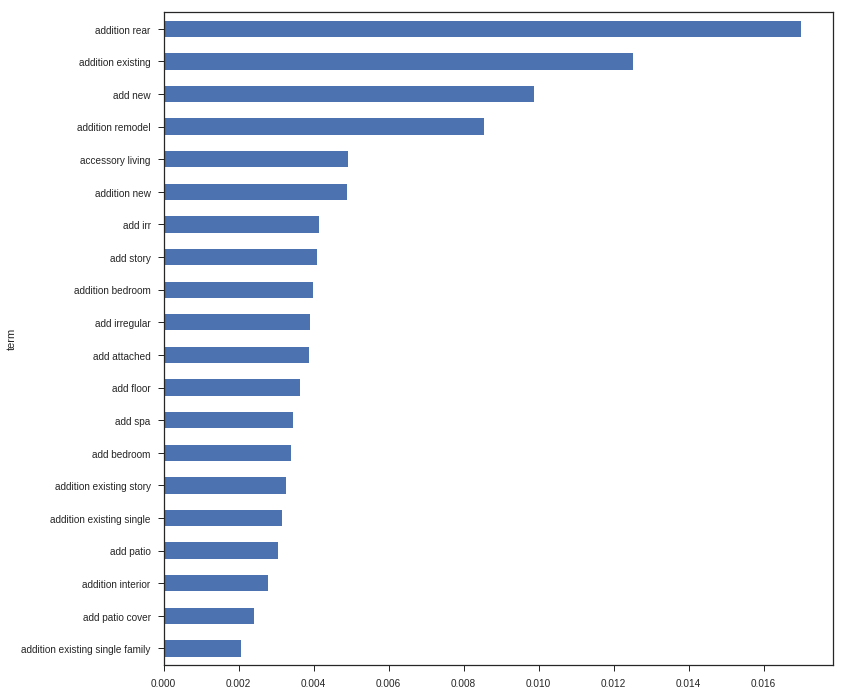

In [92]:
weight_df.head(20).set_index('term')['weight'].sort_values().plot(kind='barh', figsize=(12,12))

In [94]:
not_urgent = buidling_permit[~((buidling_permit['Status'].str.contains('CofO')) | (buidling_permit['Status'].str.contains('TCO'))) ]